In [134]:
import numpy as np
import matplotlib.pyplot as plt

## Practica 2

In [135]:
def impseq(n0, n1, n2): #funcion de impulso unitario

# Genera x(n) = delta(n-n0); n1 <= n <= n2
# ----------------------------------------------
    n = np.arange(n1, n2+1) # Se crea el vector de muestras

    x = (n-n0) == 0

    return [x,n]

def stepseq(n0, n1, n2): #funcion de escalon unitario
    # Genera x(n) = u(n - n0); n1 <= n <= n2
    # --------------------------------------
    
    n = np.arange(n1, n2 + 1)   # Vector de muestras
    x = (n >= n0).astype(int)  # Escalón unitario
    
    return x, n

def rampseq(n0, n1, n2, m=1): #funcion de rampa unitaria
    # Genera r(n) = m(n - n0)u(n - n0); n1 <= n <= n2
    # ------------------------------------------------
    
    n = np.arange(n1, n2 + 1)          # Vector de muestras
    x = m * (n - n0) * (n >= n0)      # Definición matemática
    
    return x, n

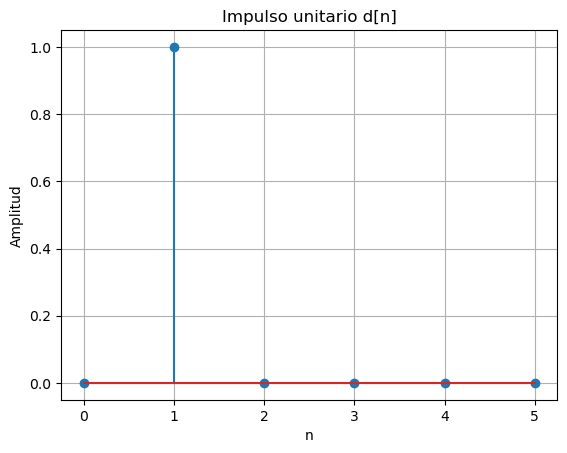

In [136]:
x, n = impseq(1, 0, 5)

plt.stem(n, x)
plt.title("Impulso unitario d[n]")
plt.xlabel("n")
plt.ylabel("Amplitud")
plt.grid()
plt.show()

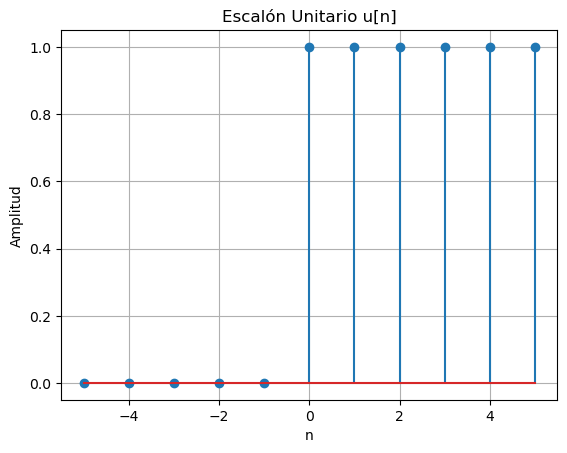

In [137]:
x, n = stepseq(0, -5, 5)

plt.stem(n, x)
plt.xlabel("n")
plt.ylabel("Amplitud")
plt.title("Escalón Unitario u[n]")
plt.grid()
plt.show()

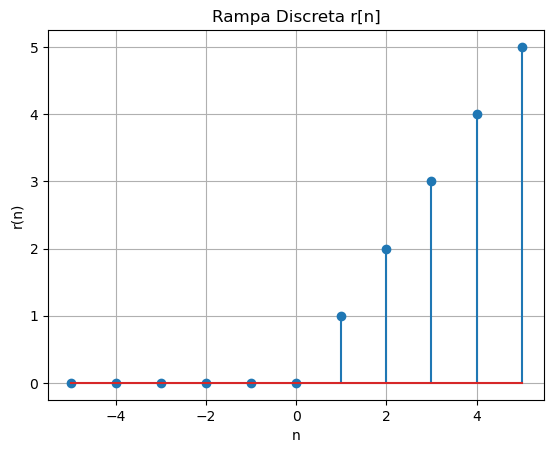

In [138]:
x, n = rampseq(0, -5, 5, 1)

plt.stem(n, x)
plt.xlabel("n")
plt.ylabel("r(n)")
plt.title("Rampa Discreta r[n]")
plt.grid()
plt.show()

## 3)

## a)

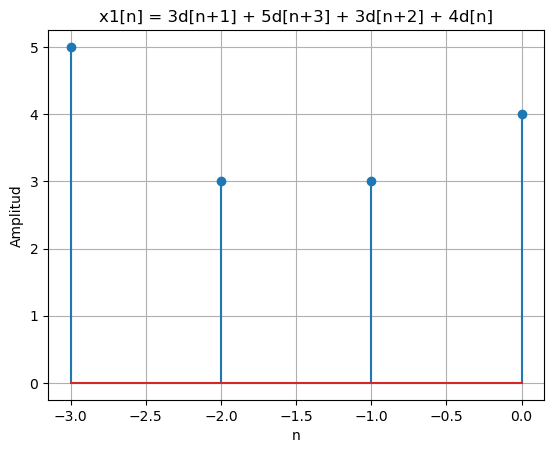

El vector de muestras es: [-3 -2 -1  0]


In [139]:
# Intervalo correcto, este se halla al simplificar la funcion y ver de donde a donde va 
n1 = -3
n2 = 0

# Construcción de la señal
d1 = impseq(-3, n1, n2)[0] #d(n+3)
d2 = impseq(-2, n1, n2)[0] #d(n+2)
d3 = impseq(-1, n1, n2)[0] #d(n+1)
d4 = impseq(0,  n1, n2)[0] #d(n)

x1 = 3*d3+5*d1+3*d2+4*d4

n = np.arange(n1, n2+1)
 
# Gráfica
plt.stem(n, x1)
plt.title("x1[n] = 3d[n+1] + 5d[n+3] + 3d[n+2] + 4d[n]")
plt.xlabel("n")
plt.ylabel("Amplitud")
plt.grid()
plt.show()

print(f"El vector de muestras es: {n}")

## b)

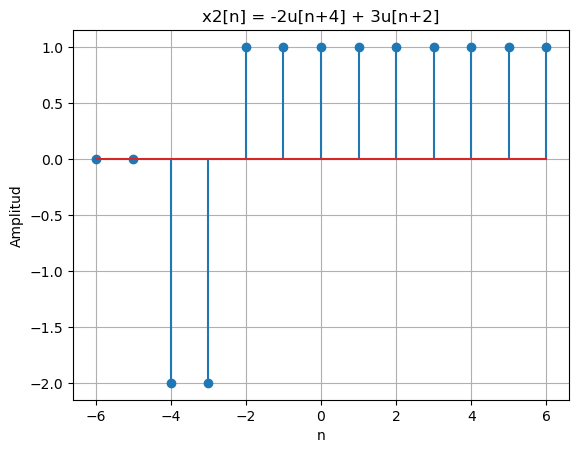

In [140]:
# Intervalo
n1, n2 = -6, 6

# Generamos escalones
u1, n = stepseq(-4, n1, n2)  # u(n+4)
u2, _ = stepseq(-2, n1, n2)  # u(n+2)

# Sistema
x2 = -2*u1 + 3*u2

# Graficar
plt.stem(n, x2)
plt.xlabel("n")
plt.ylabel("Amplitud")
plt.title("x2[n] = -2u[n+4] + 3u[n+2]")
plt.grid()
plt.show()

## c)

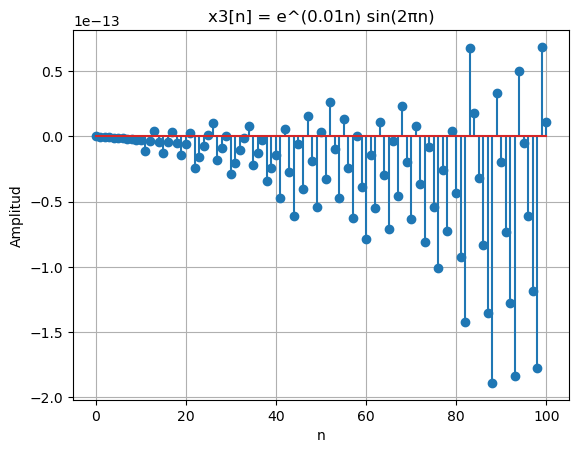

In [141]:
# Intervalo
n = np.arange(0, 101)

# Señal
x3 = np.exp(0.01*n) * np.sin(2*np.pi*n)

# Graficar
plt.stem(n, x3)
plt.xlabel("n")
plt.ylabel("Amplitud")
plt.title("x3[n] = e^(0.01n) sin(2πn)")
plt.grid()
plt.show()

## d)

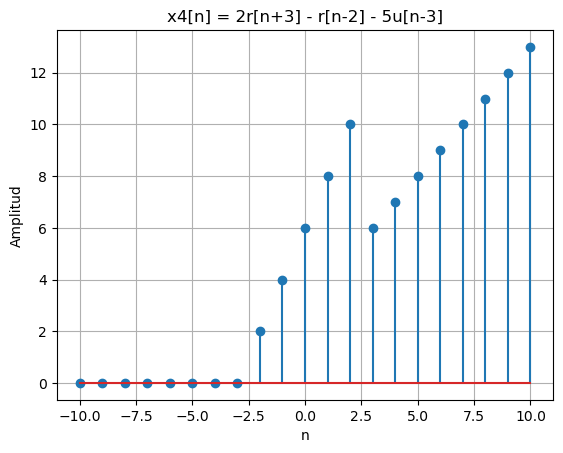

In [142]:
n1 = -10 
n2 = 10
n = np.arange(n1, n2 + 1) 
r1 = rampseq(-3,n1,n2)[0]
r2 = rampseq(2,n1,n2)[0]
u1 = stepseq(3,n1,n2)[0]
x4  = 2*r1-r2-5*u1

plt.stem(n, x4)
plt.title("x4[n] = 2r[n+3] - r[n-2] - 5u[n-3]")
plt.xlabel("n")
plt.ylabel("Amplitud")
plt.grid()
plt.show()

## 4)

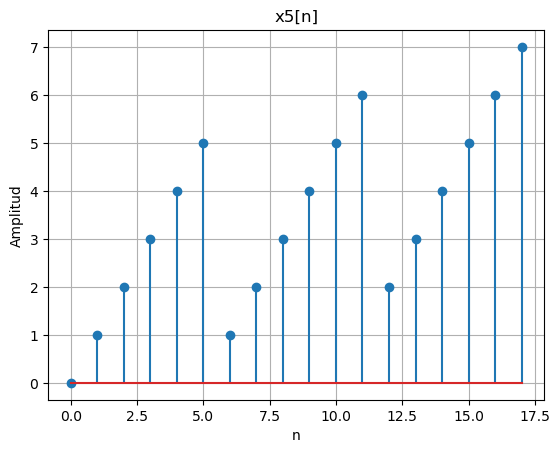

In [143]:
# Intervalo total
n1, n2 = 0, 17

# Generamos las tres rampas completas
r1, n = rampseq(0, n1, n2, 1)      # r[n]
r2, _ = rampseq(5, n1, n2, 1)      # r[n-5]
r3, _ = rampseq(10, n1, n2, 1)     # r[n-10]

# Creamos máscaras lógicas para cada tramo
mask1 = (n >= 0) & (n <= 5)
mask2 = (n >= 6) & (n <= 11)
mask3 = (n >= 12) & (n <= 17)

# Construcción vectorizada
x5 = r1*mask1 + r2*mask2 + r3*mask3

# Graficar
plt.stem(n, x5)
plt.xlabel("n")
plt.ylabel("Amplitud")
plt.title("x5[n]")
plt.grid()
plt.show()

## a)

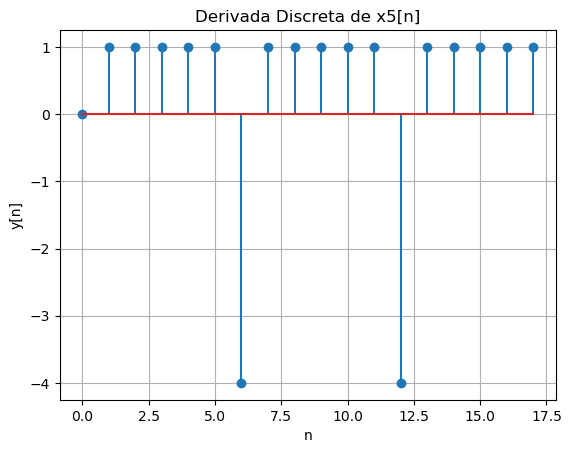

In [144]:
# Derivada discreta
y = np.zeros_like(x5)
y[1:] = x5[1:] - x5[:-1]

# Graficar
plt.stem(n, y)
plt.xlabel("n")
plt.ylabel("y[n]")
plt.title("Derivada Discreta de x5[n]")
plt.grid()
plt.show()

## b)

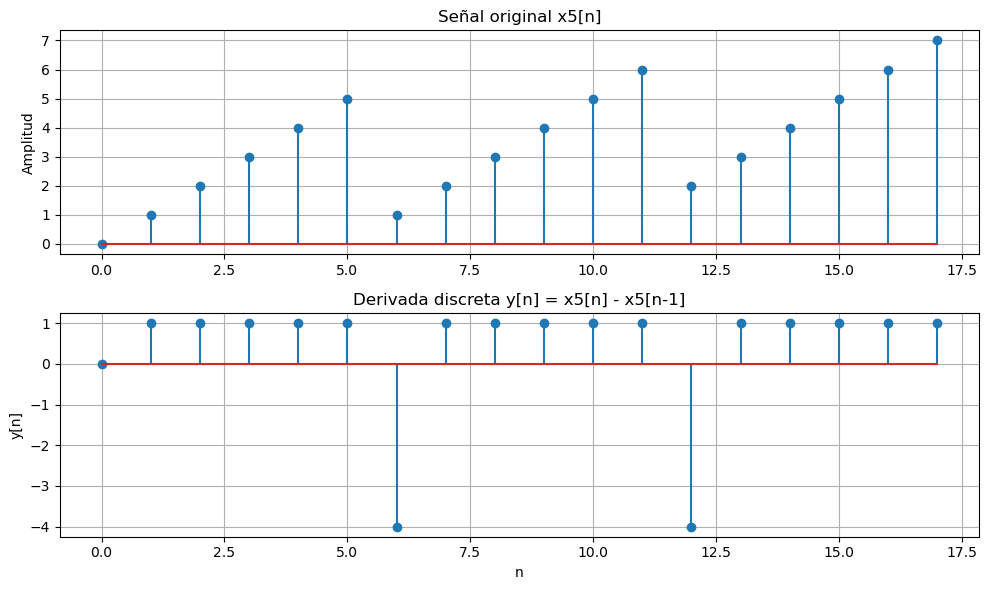

In [145]:
# ----- Subplots -----
plt.figure(figsize=(10,6))

plt.subplot(2,1,1)
plt.stem(n, x5)
plt.title("Señal original x5[n]")
plt.ylabel("Amplitud")
plt.grid()

plt.subplot(2,1,2)
plt.stem(n, y)
plt.title("Derivada discreta y[n] = x5[n] - x5[n-1]")
plt.xlabel("n")
plt.ylabel("y[n]")
plt.grid()

plt.tight_layout()
plt.show()

## 5)

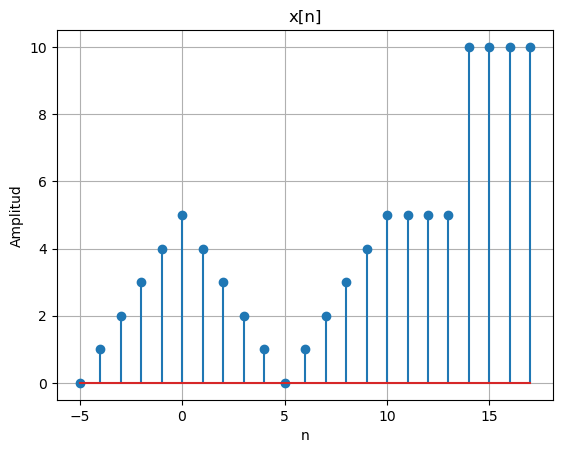

In [146]:
# Sea x(n)={0,1,2,3,4,*5*,4,3,2,1,0,1,2,3,4,5,5,5,5,10,10,10,10}. Genere la secuencia anterior y grafique los resultados. 

n  = [-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]

xn = [0,1,2,3,4,5,4,3,2,1,0,1,2,3,4,5,5,5,5,10,10,10,10]

plt.stem(n, xn)
plt.title("x[n]")
plt.xlabel("n")
plt.ylabel("Amplitud")
plt.grid()
plt.show()

## a)

In [147]:
n1, n2 = -5, 21

r1, n = rampseq(-5, n1, n2, 1)
r2, _ = rampseq(0, n1, n2, 1)
r3, _ = rampseq(5, n1, n2, 1)

triangular = r1 - 2*r2 + r3

r4, _ = rampseq(5, n1, n2, 1)
r5, _ = rampseq(9, n1, n2, 1)

rampa2 = r4 - r5

u1, _ = stepseq(10, n1, n2)
u2, _ = stepseq(14, n1, n2)

const5 = (u1 - u2)

u3, _ = stepseq(14, n1, n2)

const10 = 6*u3

xn = triangular + rampa2 + const5 + const10

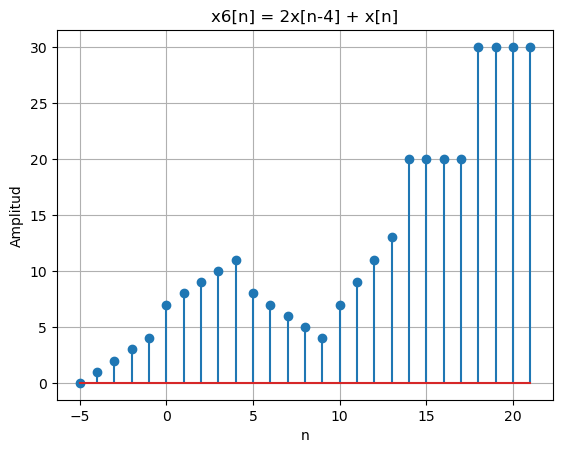

In [148]:
x_m_4 = np.zeros_like(xn)
x_m_4[4:] = xn[:-4] # esto genera x(n-4)

x6 = 2*x_m_4 + xn


plt.stem(n, x6)
plt.title("x6[n] = 2x[n-4] + x[n]")
plt.xlabel("n")
plt.ylabel("Amplitud")
plt.grid()
plt.show()

## b)

In [149]:
n1, n2 = -20, 20

r1, n = rampseq(-5, n1, n2, 1)
r2, _ = rampseq(0, n1, n2, 1)
r3, _ = rampseq(5, n1, n2, 1)

triangular = r1 - 2*r2 + r3

r4, _ = rampseq(5, n1, n2, 1)
r5, _ = rampseq(9, n1, n2, 1)

rampa2 = r4 - r5

u1, _ = stepseq(10, n1, n2)
u2, _ = stepseq(14, n1, n2)

const5 = (u1 - u2)

u3, _ = stepseq(14, n1, n2)

const10 = 6*u3

xn = triangular + rampa2 + const5 + const10

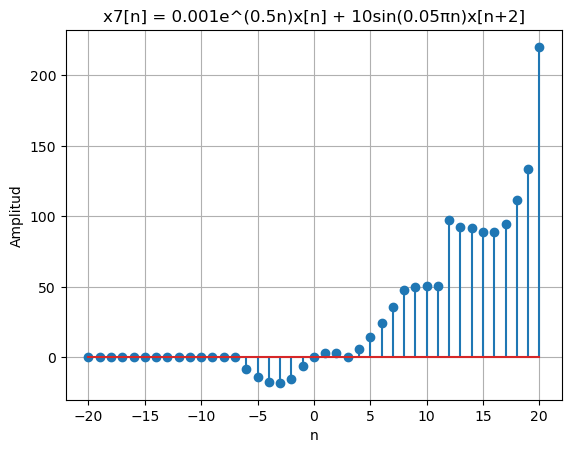

In [150]:
term1 = 0.001 * np.exp(0.5*n) * xn

x_m_2 = np.zeros_like(xn)
x_m_2[:-2] = xn[2:]   # esto genera x(n+2)

term2 = 10 * np.sin(0.05*np.pi*n) * x_m_2

x7 = term1 + term2

plt.stem(n, x7)
plt.title("x7[n] = 0.001e^(0.5n)x[n] + 10sin(0.05πn)x[n+2]")
plt.xlabel("n")
plt.ylabel("Amplitud")
plt.grid()
plt.show()